In [34]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [35]:
# Read csv
df=pd.read_csv("https://raw.githubusercontent.com/frlinh/game-analysis/main/diamondPlayerIDs.csv")

df

,Date,leagueId,queueType,tier,rank,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,hotStreak
0,8/22/2022,9a70a108-f809-45fb-9d80-1aa20100bbc8,RANKED_SOLO_5x5,DIAMOND,IV,kFWOpLcoDh0Wgqp1Cn_2fjBaWpCSkQycPffBN43--e7B1aQb,ˇ kiss ˇ,72,83,56,False,False,False,NaN,NaN,NaN,NaN,FALSE
1,8/22/2022,b4df15de-f0a7-4815-9d67-639581901281,RANKED_SOLO_5x5,DIAMOND,IV,DHAkvCTJcyHAuJYxpdyEOR2nUSl6IllUjdYY0CknYgKCvlKb,Terikuruzu,52,55,62,False,False,False,NaN,NaN,NaN,NaN,FALSE
2,8/22/2022,2ff31712-faf0-4c74-a7f8-025bc4106bcc,RANKED_SOLO_5x5,DIAMOND,IV,5ZQp2rKYI8U8l0kMKf03X3CLNLcTTrul4uTCPA30T5qsiivY,KurumaEbii,46,192,195,False,False,False,NaN,NaN,NaN,NaN,FALSE
3,8/22/2022,c7d12b58-17e5-4b6f-9eef-efd890281757,RANKED_SOLO_5x5,DIAMOND,IV,SJwLp5ZzFbdE9Qk-JTnA7M7XJkYC2vwBAdZVGnr1CTUOzkQD,swimmy1318,0,360,356,False,False,False,NaN,NaN,NaN,NaN,FALSE
4,8/22/2022,6d31cd2e-5092-4374-9e27-1015b22368dc,RANKED_SOLO_5x5,DIAMOND,IV,COsscwJOMu4KJ9w5X7ubFTEkTx2CoEcLX1-iWp1nmISs8OYi,vilest,1,82,74,False,False,True,NaN,NaN,NaN,NaN,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,8/22/2022,c8cb93c7-49af-4678-be54-996ec909d658,RANKED_SOLO_5x5,DIAMOND,I,qYUkbrsXmsjEHNRlMEzu55iM21LP7y17lpGfR5Kw9IQQQEPV,Melvox,14,28,15,False,False,False,False,NaN,NaN,NaN,NaN
816,8/22/2022,9a0d09dc-cdfa-4088-832a-c248e288d1ac,RANKED_SOLO_5x5,DIAMOND,I,YOnkR3EhJgI4Ts97_-S3AsJNSLk9837aLNk8pg12OgsyZJqC,supsupsupspsp,37,69,70,False,False,False,True,NaN,NaN,NaN,NaN
817,8/22/2022,195fea64-4a81-4293-ae8b-28b059e4bea1,RANKED_SOLO_5x5,DIAMOND,I,vk05Nta6ZUulnZqnqK7FOXa4M9LOILSYzGDtBhG7ojg2BeWt,Kan Po,0,363,346,False,False,False,False,NaN,NaN,NaN,NaN
818,8/22/2022,2d30df88-94f5-44e1-b793-52a2a58618dd,RANKED_SOLO_5x5,DIAMOND,I,jdYJupfrnS5f7TQZjHBGkAP0u3HrptxdqiHOM2Rqegv2bDJi,Tallest mountain,37,366,349,False,False,False,False,NaN,NaN,NaN,NaN


In [36]:
df.dtypes

Date             object
leagueId         object
queueType        object
tier             object
rank             object
summonerId       object
summonerName     object
leaguePoints      int64
wins              int64
losses            int64
veteran            bool
inactive           bool
freshBlood         bool
Unnamed: 13      object
Unnamed: 14     float64
Unnamed: 15     float64
Unnamed: 16     float64
hotStreak        object
dtype: object

In [37]:
# Dropping strings for modeling
df=df.drop(["Date","leagueId","queueType","tier","summonerId","summonerName","veteran","inactive","freshBlood","Unnamed: 13","hotStreak"],axis=1)
df=df.drop(["Unnamed: 14",'Unnamed: 15','Unnamed: 16'],axis=1)

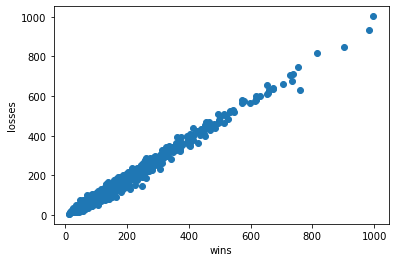

In [38]:
# Plotting wins versus losses
plt.scatter(df.wins, df.losses)
plt.xlabel('wins')
plt.ylabel('losses')
plt.show()

In [39]:
X = df.wins.values.reshape(-1, 1)

In [40]:
X[:5]

array([[ 83],
       [ 55],
       [192],
       [360],
       [ 82]], dtype=int64)

In [41]:
X.shape

(820, 1)

In [42]:
y = df.losses

In [43]:
model = LinearRegression()

In [44]:
model.fit(X, y)

LinearRegression()

In [45]:
y_pred = model.predict(X)
print(y_pred.shape)

(820,)


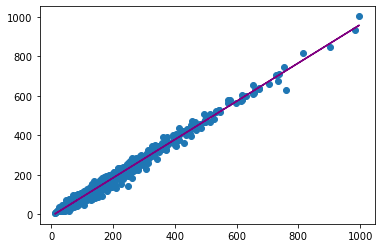

In [46]:
# Adding linear regression line to plot
plt.scatter(X, y)
plt.plot(X, y_pred, color='purple')
plt.show()

In [47]:
print(model.coef_)
print(model.intercept_)

[0.96952644]
-8.99919176775333


In [48]:
# Print dataframe and sort by rank
df

,rank,leaguePoints,wins,losses
0,IV,72,83,56
1,IV,52,55,62
2,IV,46,192,195
3,IV,0,360,356
4,IV,1,82,74
...,...,...,...,...
815,I,14,28,15
816,I,37,69,70
817,I,0,363,346
818,I,37,366,349


In [49]:
# Dropping rank to predict
y=df["rank"]
X=df.drop(columns="rank")

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape

(615, 3)

In [51]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(solver='lbfgs',
                              max_iter=200,
                              random_state=1)

In [54]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [55]:
# Predict ranks based on win rates 
y_pred=classifier.predict(X_test)
results=pd.DataFrame({"Prediction":y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,IV,II
1,IV,I
2,I,IV
3,IV,II
4,I,IV
5,II,I
6,IV,IV
7,II,IV
8,II,IV
9,IV,IV


In [56]:
# Accuracy of the prediction model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.2634146341463415
